# Project 2- Python

In [103]:
import pandas as pd

In [104]:
file = pd.read_csv(r'E:\Board Infinity\Python\Project2\Ecommerce - UK Retailer.csv',encoding= 'unicode_escape')

In [105]:
file.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custo

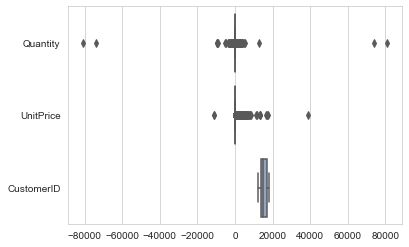

In [106]:
import seaborn as sns
ax = sns.boxplot(data=file, orient="h", palette="Set2")

In [107]:
# to perform basic EDA from above we can see that dataset also consists of negative values in quantity column. 
# Lets first clean the data set and perform Basic EDA

In [108]:
#2. Missing values in each column and replace with mean
file.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [109]:
# we will replace missing columns with mode
file['Description'] = file['Description'].fillna(file['Description'].mode()[0])
file['CustomerID'] = file['CustomerID'].fillna(file['CustomerID'].mode()[0])

In [110]:
file.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [111]:
# all missing values are replaced with mode

In [112]:
#3. Remove duplicate rows
file=file.drop_duplicates()

In [113]:
# 4. Remove rows which have negative values Quantity column
file.Quantity.describe()

count    536641.000000
mean          9.620029
std         219.130156
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [114]:
file = file[file['Quantity'] >= 0] 
# in some records unit price is negative so drop those
file = file[file['UnitPrice'] >= 0] 

In [115]:
file.Quantity.describe()

count    526052.000000
mean         10.730911
std         157.592136
min           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
max       80995.000000
Name: Quantity, dtype: float64

In [116]:
#Thus negative vales in Quantity entire row is removed

In [117]:
# 5.Add the columns-Month,Day and Hour for InvoiceDate

In [118]:

#file['InvoiceDate']= pd.to_datetime(file['InvoiceDate'])

In [119]:
file['Month'] = pd.to_datetime(file['InvoiceDate']).dt.month
file['Day'] = pd.to_datetime(file['InvoiceDate']).dt.day
file['Hour'] = pd.to_datetime(file['InvoiceDate']).dt.hour

In [120]:
file

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,12,9,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12,9,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,12,9,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,12,9,12


In [121]:
#6. How many ordersmade by the customers
Orders=len(file['InvoiceNo'].unique())
# by counting unique invoiceNo we can get total orders made by the customers
print('Total Orders made by customers= ',Orders)

Total Orders made by customers=  20726


In [122]:
#7 Top5 Customers with highest number of orders
top5 = file[['CustomerID','InvoiceNo']].groupby(['CustomerID'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['orders_count'], ascending=False) \
                             .head(5)

In [123]:
top5

,CustomerID,orders_count
4011,17841.0,2314
326,12748.0,210
1880,14911.0,201
562,13089.0,97
1662,14606.0,93


In [124]:
#8. How much money spent by customer
file.describe()

,Quantity,UnitPrice,CustomerID,Month,Day,Hour
count,526052.000000,526052.000000,526052.000000,526052.000000,526052.000000,526052.000000
mean,10.730911,3.913818,15934.821637,7.551877,15.026239,13.074630
std,157.592136,36.053205,1850.841268,3.508397,8.661348,2.442557
min,1.000000,0.000000,12346.000000,1.000000,1.000000,6.000000
25%,1.000000,1.250000,14382.000000,5.000000,7.000000,11.000000
50%,4.000000,2.080000,16279.000000,8.000000,15.000000,13.000000
75%,11.000000,4.130000,17841.000000,11.000000,22.000000,15.000000
max,80995.000000,13541.330000,18287.000000,12.000000,31.000000,20.000000


In [125]:
file['Value'] = file['UnitPrice']*file['Quantity']

In [126]:
print('Total Money Spent By customers',file['Value'].sum())

Total Money Spent By customers 10642110.804000003


In [127]:
#9. top 5 customers with highest money spent
top5_Cust_Money = file[['CustomerID','Value']].sort_values(['Value'], ascending=False) \
                             .head(5)

In [128]:
top5_Cust_Money

,CustomerID,Value
540421,16446.0,168469.60
61619,12346.0,77183.60
222680,15098.0,38970.00
15017,17841.0,13541.33
299982,17841.0,11062.06


In [129]:
#10 orders Per each Month
file[['Month','InvoiceNo']].groupby(['Month'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['Month'], ascending=True) 

,Month,orders_count
0,1,1120
1,2,1126
2,3,1531
3,4,1318
4,5,1731
5,6,1576
6,7,1540
7,8,1407
8,9,1896
9,10,2129


In [130]:
#11 Orders Per Day
file[['Day','InvoiceNo']].groupby(['Day'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['Day'], ascending=True) 

,Day,orders_count
0,1,780
1,2,686
2,3,577
3,4,708
4,5,795
5,6,882
6,7,851
7,8,887
8,9,732
9,10,723


In [131]:
#12 Orders Per Hour
file[['Hour','InvoiceNo']].groupby(['Hour'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['Hour'], ascending=True) 

,Hour,orders_count
0,6,1
1,7,29
2,8,568
3,9,1538
4,10,2431
5,11,2473
6,12,3323
7,13,2818
8,14,2555
9,15,2474


In [132]:
#13 orders Per each Country
file[['Country','InvoiceNo']].groupby(['Country'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['orders_count'], ascending=True) 

,Country,orders_count
4,Brazil,1
29,Saudi Arabia,1
28,RSA,1
21,Lebanon,1
8,Czech Republic,2
35,United Arab Emirates,3
2,Bahrain,3
11,European Community,4
22,Lithuania,4
34,USA,5


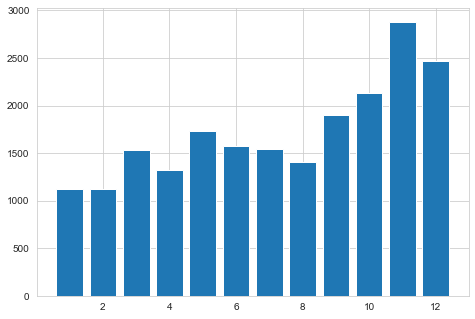

In [133]:
#14. Orders Trend Accross Month
month=file[['Month','InvoiceNo']].groupby(['Month'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['Month'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(month['Month'],month['orders_count'])
plt.show()

In [134]:
# Orders are more in 11th Month and less in 1st and 2nd Months. Orders trend increased at year end.

In [135]:
#15. Money spentby each Country
file[['Country','Value']].groupby(['Country'])['Value'] \
                             .sum()\
                             .reset_index(name='money_spent') \
                             .sort_values(['money_spent'], ascending=True)

,Country,money_spent
29,Saudi Arabia,1.459200e+02
2,Bahrain,7.541400e+02
8,Czech Republic,8.267400e+02
28,RSA,1.002310e+03
4,Brazil,1.143600e+03
11,European Community,1.300250e+03
22,Lithuania,1.661060e+03
21,Lebanon,1.693880e+03
35,United Arab Emirates,1.902280e+03
23,Malta,2.725590e+03


In [136]:
#1. Basic EDA


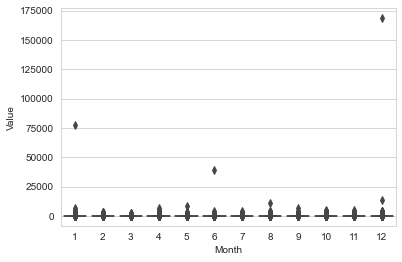

In [137]:
#a. Box-Plot
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style("whitegrid") 
sns.boxplot(x = 'Month', y = 'Value', data = file)

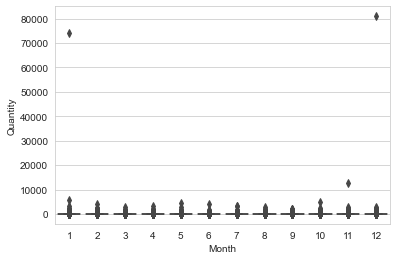

In [138]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'Month', y = 'Quantity', data = file)

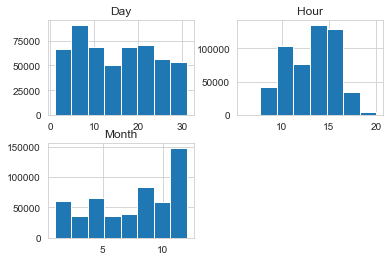

In [139]:
#b. Histogram
hist = file.hist(column=['Day','Hour','Month'],bins=8)

In [140]:
import matplotlib.pyplot as plt

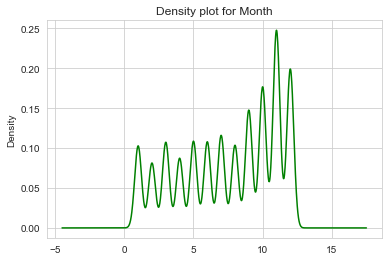

In [141]:
#c distribution plot
file.Month.plot.density(color='green') 
plt.title('Density plot for Month') 
plt.show()

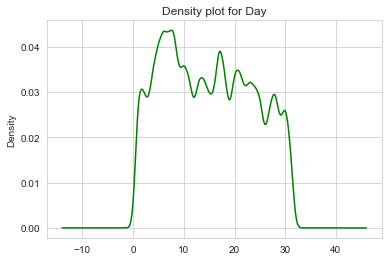

In [142]:
file.Day.plot.density(color='green') 
plt.title('Density plot for Day') 
plt.show()

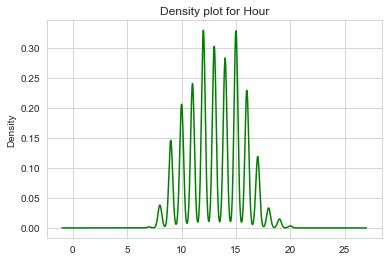

In [143]:
file.Hour.plot.density(color='green') 
plt.title('Density plot for Hour') 
plt.show()

In [144]:
#d Aggregation:
file.aggregate({"Value":['sum', 'min','max'], 
              "Quantity":['sum', 'min','max'], 
              "UnitPrice":['sum', 'min','max'],})

,Value,Quantity,UnitPrice
sum,1.064211e+07,5645017,2058872.044
min,0.000000e+00,1,0.000
max,1.684696e+05,80995,13541.330


In [145]:
#e Unique values across columns.
pd.unique(file.values.ravel())

array(['536365', '85123A', 'WHITE HANGING HEART T-LIGHT HOLDER', ...,
       '12/9/2011 12:49', '581587', '12/9/2011 12:50'], dtype=object)

In [146]:
#f Duplicated were already removed earlier

In [147]:
#g Correlation- Heat map
import seaborn as sns
import matplotlib.pyplot as plt
file.corr()

,Quantity,UnitPrice,CustomerID,Month,Day,Hour,Value
Quantity,1.000000,-0.003831,-0.020779,-0.002358,-0.000655,-0.018536,0.898783
UnitPrice,-0.003831,1.000000,0.017916,0.000382,-0.000556,0.004351,0.137396
CustomerID,-0.020779,0.017916,1.000000,0.005248,-0.004035,0.191247,-0.012188
Month,-0.002358,0.000382,0.005248,1.000000,-0.117780,0.026919,0.000472
Day,-0.000655,-0.000556,-0.004035,-0.117780,1.000000,0.000331,-0.001864
Hour,-0.018536,0.004351,0.191247,0.026919,0.000331,1.000000,-0.015688
Value,0.898783,0.137396,-0.012188,0.000472,-0.001864,-0.015688,1.000000


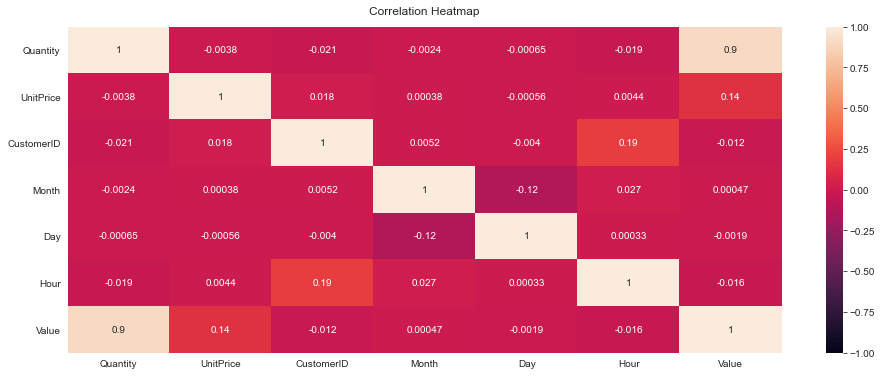

In [148]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(file.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


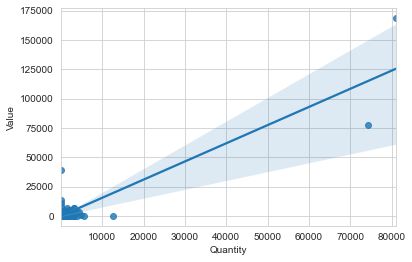

In [149]:
#h regression plot
import seaborn as sns; 
#sns.set_theme(color_codes=True)
ax = sns.regplot(x="Quantity", y="Value", data=file)

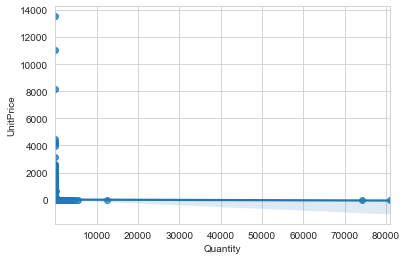

In [150]:
ax = sns.regplot(x="Quantity", y="UnitPrice", data=file)

In [151]:
#i. bar plot every categorial value

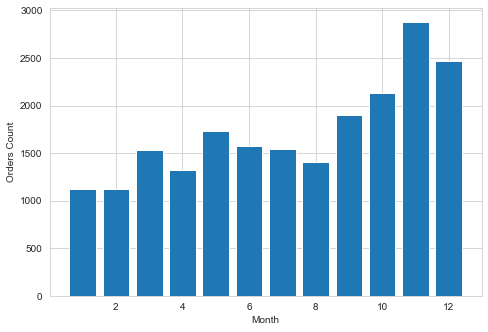

In [152]:
month=file[['Month','InvoiceNo']].groupby(['Month'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['Month'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(month['Month'],month['orders_count'])
ax.set_ylabel('Orders Count')
ax.set_xlabel('Month')
plt.show()

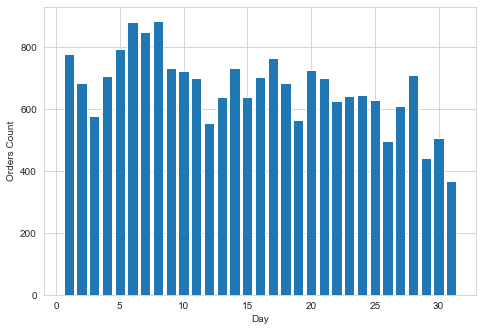

In [153]:
month=file[['Day','InvoiceNo']].groupby(['Day'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['Day'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(month['Day'],month['orders_count'])
ax.set_ylabel('Orders Count')
ax.set_xlabel('Day')
plt.show()

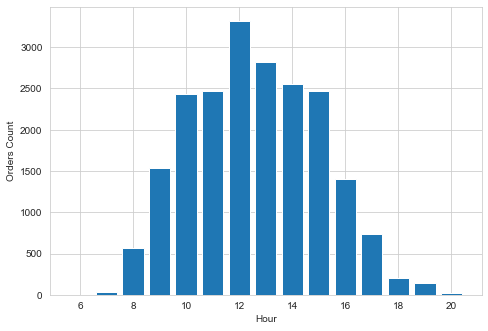

In [154]:
month=file[['Hour','InvoiceNo']].groupby(['Hour'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['Hour'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(month['Hour'],month['orders_count'])
ax.set_ylabel('Orders Count')
ax.set_xlabel('Hour')
plt.show()

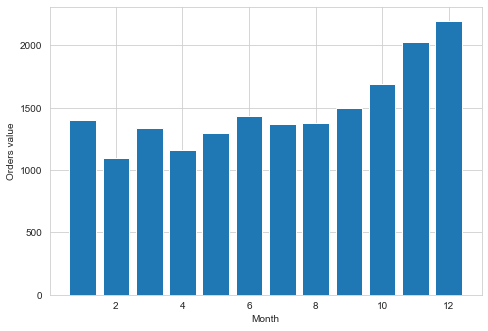

In [155]:
month=file[['Month','Value']].groupby(['Month'])['Value'] \
                             .nunique() \
                             .reset_index(name='orders_value') \
                             .sort_values(['Month'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(month['Month'],month['orders_value'])
ax.set_ylabel('Orders value')
ax.set_xlabel('Month')
plt.show()

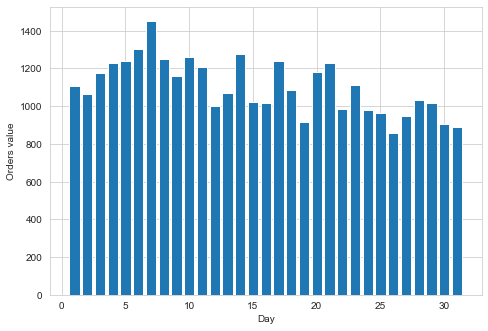

In [156]:
month=file[['Day','Value']].groupby(['Day'])['Value'] \
                             .nunique() \
                             .reset_index(name='orders_value') \
                             .sort_values(['Day'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(month['Day'],month['orders_value'])
ax.set_ylabel('Orders value')
ax.set_xlabel('Day')
plt.show()

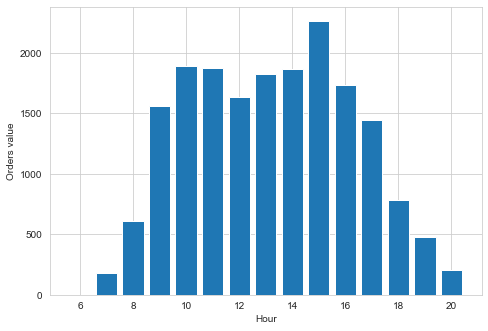

In [157]:
month=file[['Hour','Value']].groupby(['Hour'])['Value'] \
                             .nunique() \
                             .reset_index(name='orders_value') \
                             .sort_values(['Hour'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(month['Hour'],month['orders_value'])
ax.set_ylabel('Orders value')
ax.set_xlabel('Hour')
plt.show()

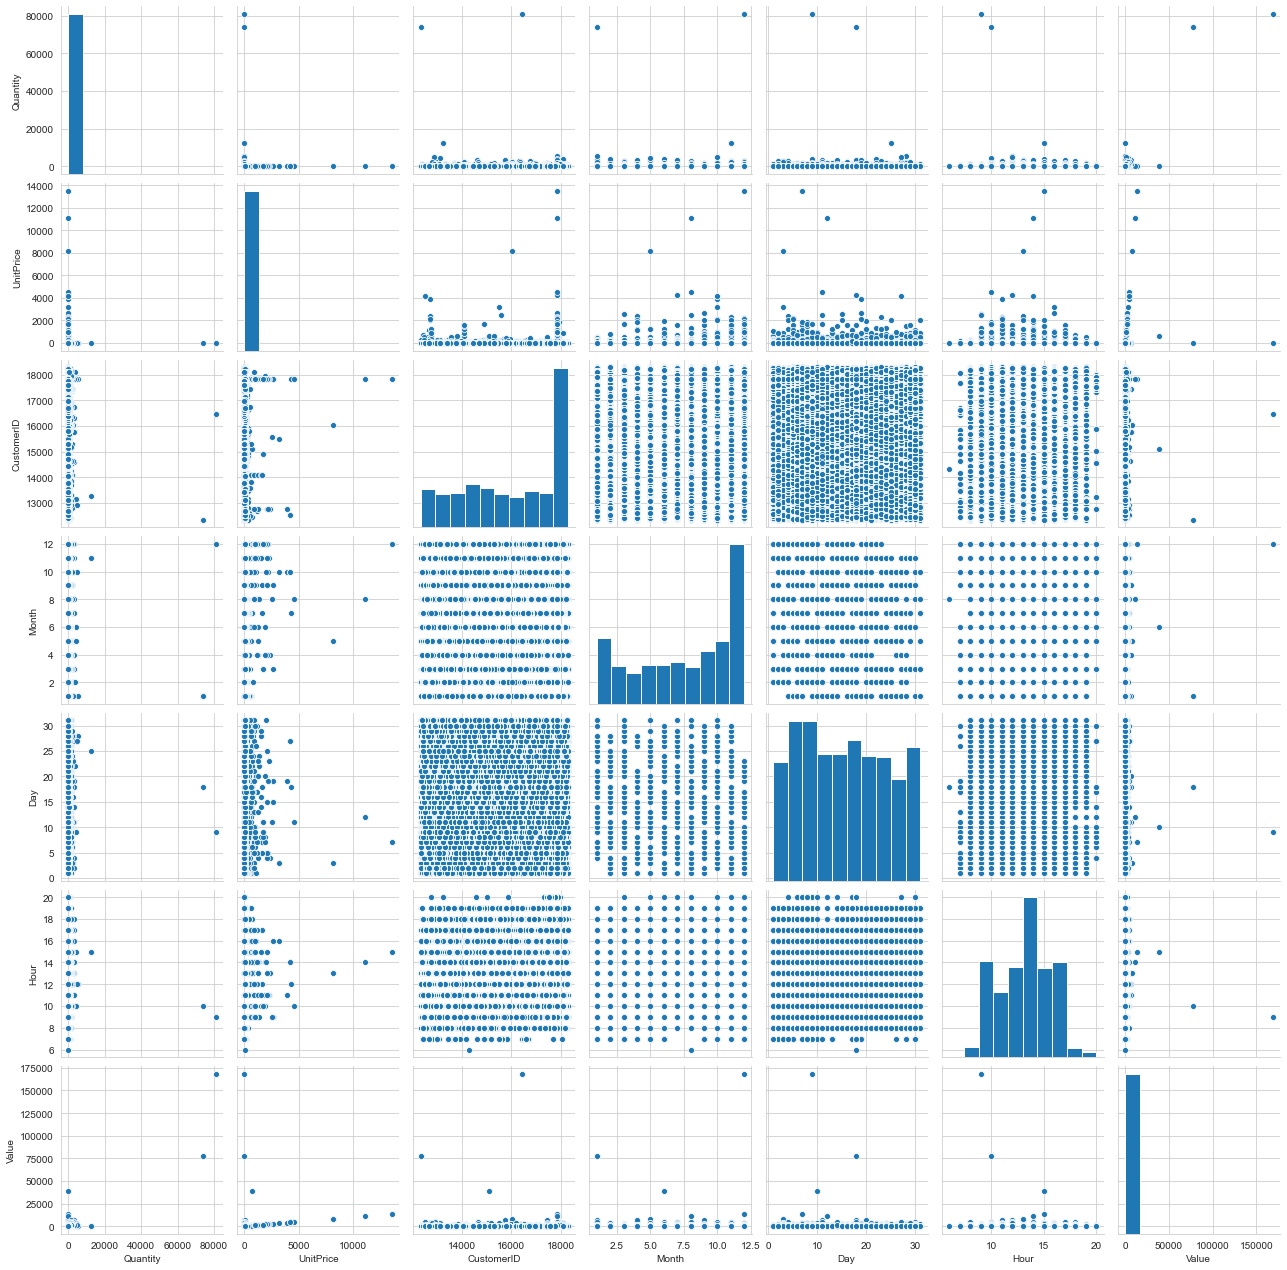

In [158]:
#j. Pair Plot
sns.pairplot(file)

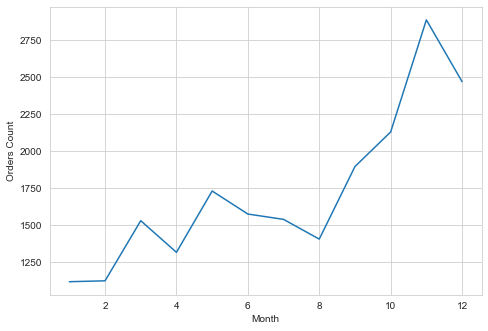

In [159]:
#k. line chart
month=file[['Month','InvoiceNo']].groupby(['Month'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['Month'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(month['Month'],month['orders_count'])
ax.set_ylabel('Orders Count')
ax.set_xlabel('Month')
plt.show()

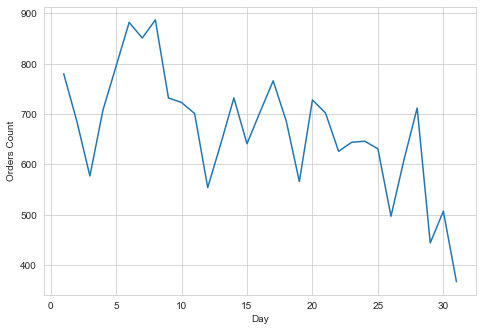

In [160]:
month=file[['Day','InvoiceNo']].groupby(['Day'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['Day'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(month['Day'],month['orders_count'])
ax.set_ylabel('Orders Count')
ax.set_xlabel('Day')
plt.show()

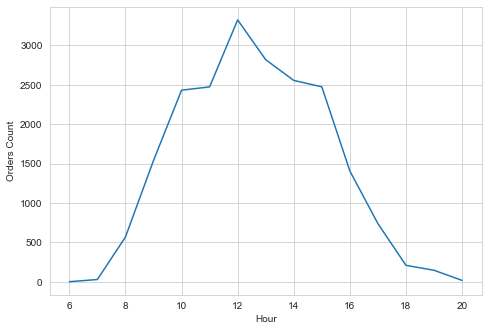

In [161]:
month=file[['Hour','InvoiceNo']].groupby(['Hour'])['InvoiceNo'] \
                             .nunique() \
                             .reset_index(name='orders_count') \
                             .sort_values(['Hour'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(month['Hour'],month['orders_count'])
ax.set_ylabel('Orders Count')
ax.set_xlabel('Hour')
plt.show()

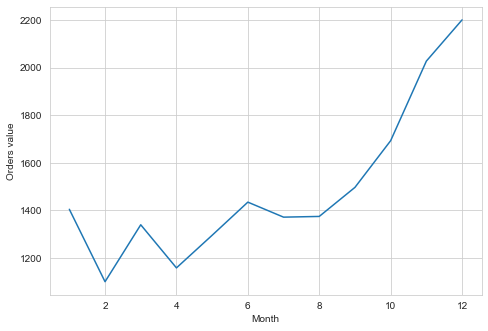

In [162]:
month=file[['Month','Value']].groupby(['Month'])['Value'] \
                             .nunique() \
                             .reset_index(name='orders_value') \
                             .sort_values(['Month'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(month['Month'],month['orders_value'])
ax.set_ylabel('Orders value')
ax.set_xlabel('Month')
plt.show()

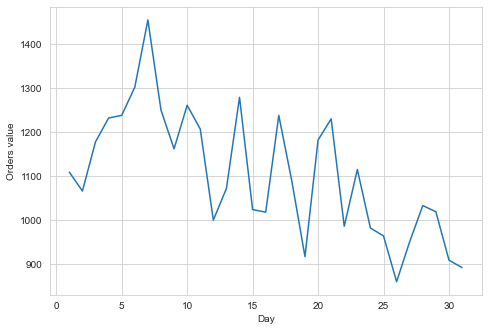

In [163]:
month=file[['Day','Value']].groupby(['Day'])['Value'] \
                             .nunique() \
                             .reset_index(name='orders_value') \
                             .sort_values(['Day'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(month['Day'],month['orders_value'])
ax.set_ylabel('Orders value')
ax.set_xlabel('Day')
plt.show()

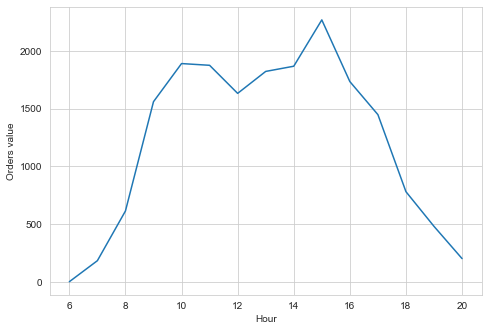

In [164]:
month=file[['Hour','Value']].groupby(['Hour'])['Value'] \
                             .nunique() \
                             .reset_index(name='orders_value') \
                             .sort_values(['Hour'], ascending=True) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(month['Hour'],month['orders_value'])
ax.set_ylabel('Orders value')
ax.set_xlabel('Hour')
plt.show()

In [165]:
#i. Skewness
sk=file.skew(axis = 0, skipna = True) 

In [166]:
sk

Quantity      457.998552
UnitPrice     205.307005
CustomerID     -0.408353
Month          -0.414167
Day             0.141669
Hour           -0.002366
Value         504.787244
dtype: float64

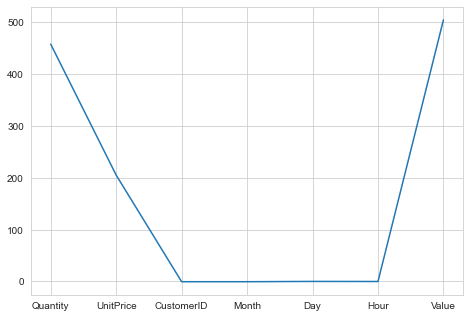

In [167]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(sk)
plt.show()